In [2]:

import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
#splitting the data into test and train portions
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
#Getting the shapes of the dataset
print("Shape of x_train = "+str(x_train.shape))
print("Shape of y_train = "+str(y_train.shape))
print("Shape of x_test = "+str(x_test.shape))
print("Shape of y_test = "+str(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train = (60000, 28, 28)
Shape of y_train = (60000,)
Shape of x_test = (10000, 28, 28)
Shape of y_test = (10000,)


In [0]:
#Size of the images in dataset
img_rows, img_cols=28, 28
#reshaping the images to include the channel in it
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
inpx = (img_rows, img_cols, 1) 
  
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255


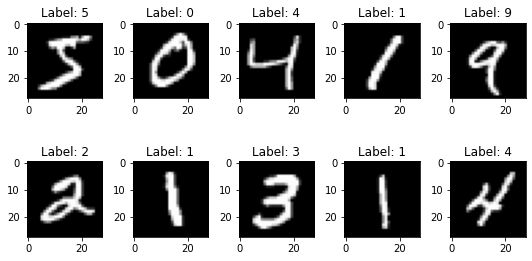

In [14]:
# plot images
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [16]:
# Now as this is multi class classification so we need to make the class variables
# hence, we need to categorize the labels

from keras.utils import to_categorical
num_classes = 10
y_train_categorized = to_categorical(y_train,num_classes)
y_test_categorized = to_categorical(y_test,num_classes)
y_train_categorized.shape, y_test_categorized.shape


((60000, 10), (10000, 10))

In [0]:
# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(x_train))

x_train = x_train[indexes]
y_train_categorized = y_train_categorized[indexes]

# now set-aside 10% of the train_data/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(x_train))

# first pick validation set from train_data/labels
val_data = x_train[:val_count,:]
val_labels = y_train_categorized[:val_count,:]

# leave rest in training set
train_data = x_train[val_count:,:]
train_labels = y_train_categorized[val_count:,:]

In [27]:
#Finally training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(10, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [28]:
history = model.fit(train_data, train_labels, 
                    epochs=19, batch_size=64,
                    validation_data=(val_data, val_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/19
54000/54000 [==============================] - 9s 173us/step - loss: 0.1872 - accuracy: 0.9421 - val_loss: 0.0529 - val_accuracy: 0.9855
Epoch 2/19
54000/54000 [==============================] - 8s 157us/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0313 - val_accuracy: 0.9915
Epoch 3/19
54000/54000 [==============================] - 8s 155us/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 4/19
54000/54000 [==============================] - 8s 156us/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0353 - val_accuracy: 0.9883
Epoch 5/19
54000/54000 [==============================] - 8s 155us/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0297 - val_accuracy: 0.9923
Epoch 6/19
54000/54000 [==============================] - 8s 153us/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 7/19
54000/54000 [==============================] - 8s 15

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


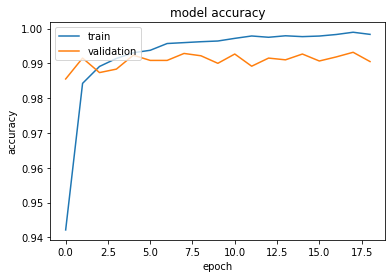

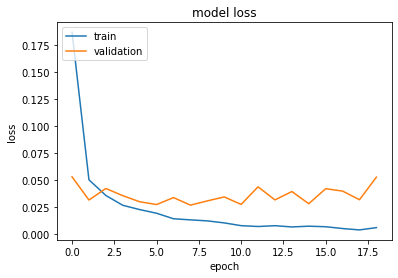

In [29]:
print(history.history.keys())

#  "Accuracy" plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss" plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorized, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

10000/10000 [==============================] - 1s 68us/step
Test loss: 0.0527 accuracy: 0.9900
